In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

# DATA !

In [2]:
data = pd.read_csv("../input/bank-data/Bank_Term_Deposit.csv")

In [3]:
data.shape

(11162, 17)

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# Transform categorical data

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
data.deposit.replace({'yes':1, 'no':0}, inplace = True)

In [8]:
#data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']].apply(LabelEncoder().fit_transform)

In [9]:
le = LabelEncoder()
for c in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']:
    data[c] = le.fit_transform(data[c].values)

In [10]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,may,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,may,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,may,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,may,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,may,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,apr,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,jun,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,aug,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,may,9,2,172,5,0,0


# # Some Feature Engineering

# First Data Representation :

We will encode dates folowing a sequentiel encoding. This means that days will still as they are (the actual number), concerning the month they will take values from 0-11, according on their sequentiel position in the calendar (minus 1)

In [11]:
data_seq = data.copy()
data_seq['month'] = le.fit_transform(data_seq['month'].values)

In [12]:
data_seq

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [13]:
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(data_seq.iloc[:,:-1].values, data_seq.iloc[:,-1].values, test_size=0.33, random_state=42)

In [14]:
X_train_seq

array([[ 52,   5,   1, ...,  -1,   0,   3],
       [ 40,   1,   1, ..., 344,   1,   0],
       [ 35,   4,   1, ...,  -1,   0,   3],
       ...,
       [ 35,   9,   1, ...,  -1,   0,   3],
       [ 51,   5,   1, ...,  -1,   0,   3],
       [ 30,   4,   2, ...,  -1,   0,   3]])

In [15]:
y_train_seq

array([1, 0, 1, ..., 0, 1, 0])

# Second Data Representation :

We will encode dates folowing a cyclical encoding. We will consider date as cyclical features.
This means that days will still as they are (the actual number), concerning the month they will take values from 0-11, according on their sequentiel position in the calendar (minus 1)

In [16]:
data_seq.month.unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

Tranforming months into cyclical features

In [17]:
# get to numerical representation 
data_cyc = data_seq.copy()
# use cyclical caractheristic
data_cyc['month_sin'] = np.sin((data_cyc.month)*(2.*np.pi/12))
data_cyc['month_cos'] = np.cos((data_cyc.month)*(2.*np.pi/12))

In [18]:
data_cyc.drop('month', axis=1, inplace = True)

In [19]:
y_data_cyc = data_cyc[['deposit']].copy()
X_data_cyc = data_cyc.drop('deposit', axis=1)


In [20]:
X_data_cyc

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,month_sin,month_cos
0,59,0,1,1,0,2343,1,0,2,5,1042,1,-1,0,3,-8.660254e-01,-0.500000
1,56,0,1,1,0,45,0,0,2,5,1467,1,-1,0,3,-8.660254e-01,-0.500000
2,41,9,1,1,0,1270,1,0,2,5,1389,1,-1,0,3,-8.660254e-01,-0.500000
3,55,7,1,1,0,2476,1,0,2,5,579,1,-1,0,3,-8.660254e-01,-0.500000
4,54,0,1,2,0,184,0,0,2,5,673,2,-1,0,3,-8.660254e-01,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,257,1,-1,0,3,0.000000e+00,1.000000
11158,39,7,1,1,0,733,0,0,2,16,83,4,-1,0,3,1.224647e-16,-1.000000
11159,32,9,2,1,0,29,0,0,0,19,156,2,-1,0,3,5.000000e-01,0.866025
11160,43,9,1,1,0,0,0,1,0,8,9,2,172,5,0,-8.660254e-01,-0.500000


In [21]:
X_train_cyc, X_test_cyc, y_train_cyc, y_test_cyc = train_test_split(X_data_cyc.iloc[:,:].values, y_data_cyc.iloc[:,:].values, test_size=0.33, random_state=42)

In [22]:
y_train_cyc = y_train_cyc.reshape((-1))

In [23]:
y_test_cyc = y_test_cyc.reshape((-1))

# Models ! 

a function that help detecting overfitting


In [24]:
import matplotlib.pyplot as plt


In [25]:
def plot_train_val(history):
    # Retrieve a list of accuracy results on training and validation data
    # sets for each training epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Retrieve a list of list results on training and validation data
    # sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc, label = 'train_acc')
    plt.plot(epochs, val_acc, label = 'val_acc')
    plt.title('Training and validation accuracy')

    plt.figure()

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')

we will test the same configuration of a model  with both representation

In [26]:
X_train_seq.shape

(7478, 16)

In [27]:
import tensorflow as tf

# Model 1

# First Repsentation

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,993
Trainable params: 2,993
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
234/234 [==============================] - 2s 4ms/step - loss: 2.6253 - accuracy: 0.5719 - val_loss: 1.0177 - val_accuracy: 0.6830
Epoch 2/50
234/234 [==============================] - 1s 4ms/step - loss: 1.2945 - accuracy: 0.6724 - val

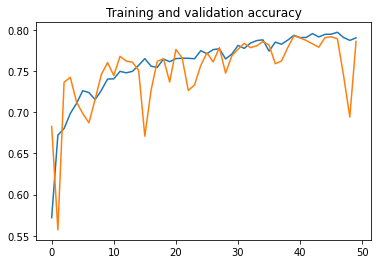

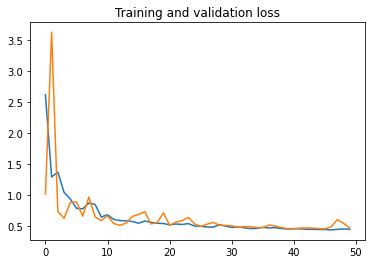

In [28]:
import tensorflow.keras.layers as layers
model = tf.keras.Sequential([
    layers.Input(shape = (16,)),
    layers.Dense(16, activation = 'relu'),
   # tf.keras.layers.Dropout(0.2),
    layers.Dense(32, activation = 'relu'),
    #tf.keras.layers.Dropout(0.2),
    layers.Dense(64, activation = 'relu'),
    #tf.keras.layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid')
    ])



print(model.summary())

model.compile(loss='BinaryCrossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(X_train_seq, y_train_seq
#                     batch_size=128,
                    ,epochs=50,
#                     verbose=1
                   validation_data=(X_test_seq, y_test_seq)
                )

plot_train_val(history)

# Second Repsentation

In [29]:
X_train_cyc.shape

(7478, 17)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                288       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
234/234 [==============================] - 1s 4ms/step - loss: 1.7228 - accuracy: 0.6494 - val_loss: 1.2666 - val_accuracy: 0.6713
Epoch 2/50
234/234 [==============================] - 1s 3ms/step - loss: 1.4038 - accuracy: 0.6888 - v

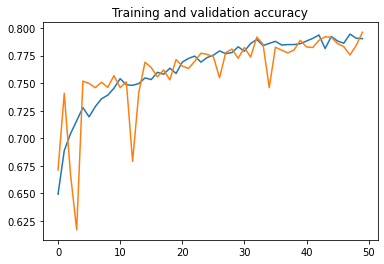

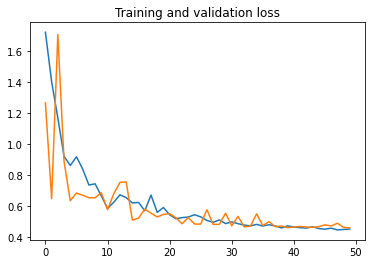

In [30]:
model = tf.keras.Sequential([
    layers.Input(shape = (17,)),
    layers.Dense(16, activation = 'relu'),
   # tf.keras.layers.Dropout(0.2),
    layers.Dense(32, activation = 'relu'),
    #tf.keras.layers.Dropout(0.2),
    layers.Dense(64, activation = 'relu'),
    #tf.keras.layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid')
    ])



print(model.summary())
model.compile(loss='BinaryCrossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(X_train_cyc, y_train_cyc
#                     batch_size=128,
                    ,epochs=50,
#                     verbose=1
                   validation_data=(X_test_cyc, y_test_cyc)
                )

plot_train_val(history)

# Conclusion

Running the same configuration (the same model) with both representation, we notice that cyclical data representation of month didn't improve the results. This can be due to the nature of deep learning that can learn automatically hiden patterns, a therefore using the sequentiel representation will be the same as using the cyclical one.